# Focusing a Gauss beam

In [1]:
from diffractio import np
from diffractio import degrees, um

from diffractio.vector_fields_X import Vector_field_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.vector_fields_XZ import Vector_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

In [2]:
from py_pol.jones_vector import Jones_vector

## Propagation of a Gauss beam 

When we define the Gauss beam, we define the position of the beam waist, z0, and the the width at focus, w0. In ths case, z0 is the distance from the initial plane:

In [5]:
x0 = np.linspace(-150 * um, 150 * um, 1024)
z0 = np.linspace(-100 * um, 100 * um, 1024)

wavelength = 7.5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=100 * um, w0=5 * um, theta=0 * degrees)

In [35]:
# definition of polarization
j0 = Jones_vector().general_azimuth_ellipticity(azimuth=0*degrees, ellipticity=0*degrees)
print(j0)

E = 
[+1.000]   
[+0.000]   



## Vacuum

In [36]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(-100 * um, 100 * um, 512)

wavelength = 10 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=100 * um, w0=10 * um, theta=0 * degrees)

In [37]:
EH_xz = Vector_field_XZ(x0,z0, wavelength)
EH_xz.incident_field(u0=u0, j0=j0)


In [38]:
EH_xz.FP_WPM(has_edges=30*um, verbose=False)

As we can see, the shape at the incident beam, has not w0=5 um.

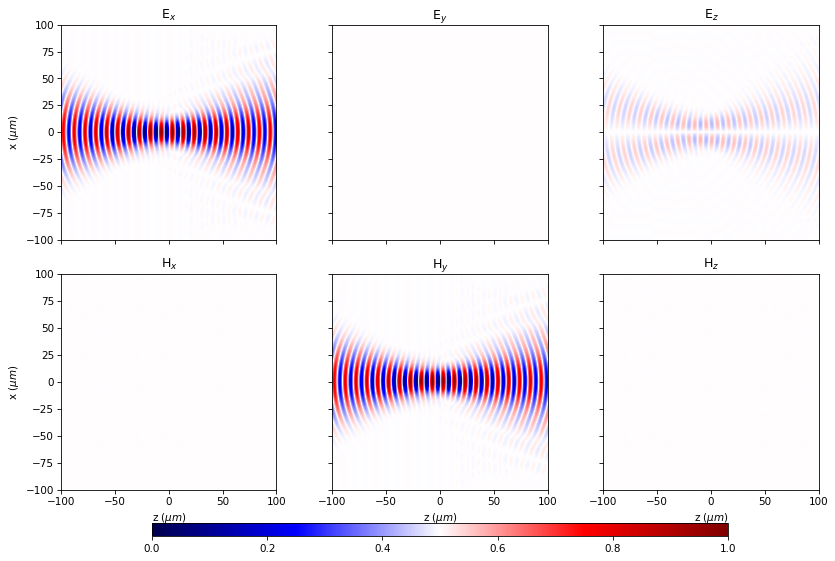

In [39]:
EH_xz.draw('EH', scale='scaled', color='k.', ms=0.05)

Let us see the propagation

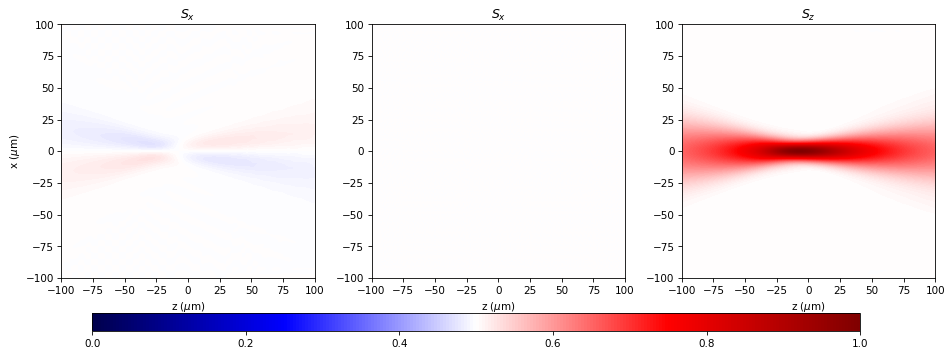

In [40]:
EH_xz.draw('poynting_vector_averaged', scale='scaled', color='k.', ms=0.2)

## Layer
When the Gauss beam reaches a layer of dielectric, the wavefront and the beam profile changes

In [41]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(-100 * um, 100 * um, 512)

wavelength = 10 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=100 * um, w0=10 * um, theta=0 * degrees)

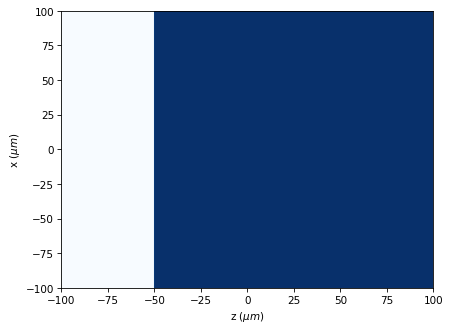

In [42]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)
u1.semi_plane(r0=(0, -50), refractive_index=2, angle=0 * degrees)
u1.draw_refractive_index()

In [43]:
EH_xz = Vector_field_XZ(x0,z0, wavelength)
EH_xz.incident_field(u0=u0, j0=j0)
EH_xz.refractive_index_from_scalarXZ(u1)

In [44]:
EH_xz.FP_WPM(has_edges=30*um, verbose=False)

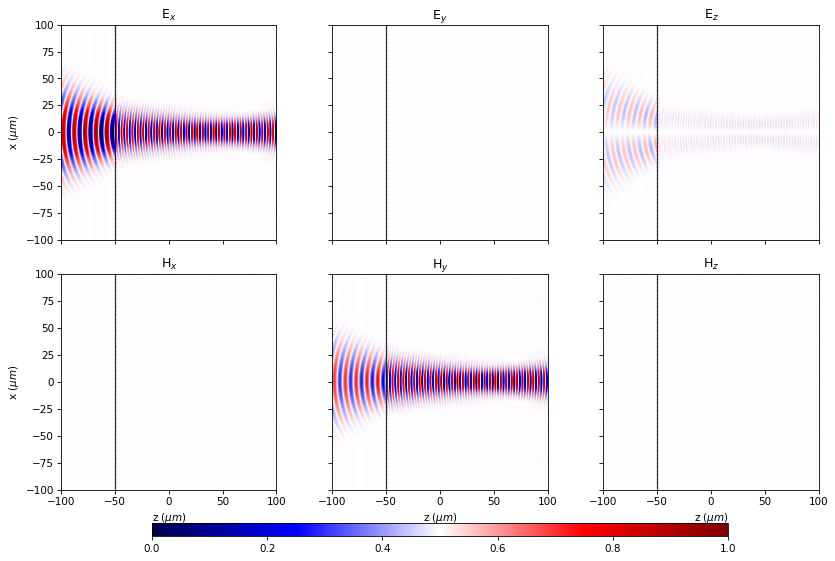

In [45]:
EH_xz.draw('EH', scale='scaled', color='k.', ms=0.2)

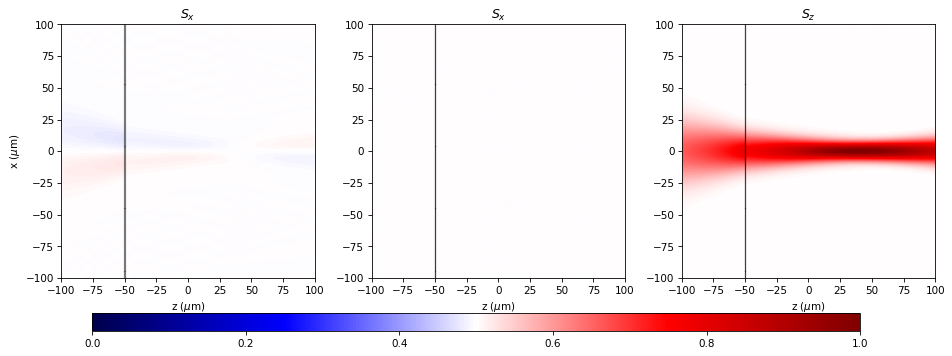

In [46]:
EH_xz.draw('poynting_vector_averaged', scale='scaled', color='k.', ms=0.2)

As can be seen, the beam waist is not at the same position.